In [27]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  loan_status  
0                 1       22800            0  
1                 0       13600            0  
2                 0       16100            0  
3                 1       22700            0  
4                 1       23000            0  
       loan_size  interest_rate  borrower_income  debt_to_income  \
77531    19100.0         11.261            86600        0.653580   
77532    17700.0         10.662            80900        0.629172   
77533    17600.0         10

array([[<Axes: title={'center': 'loan_size'}>,
        <Axes: title={'center': 'interest_rate'}>,
        <Axes: title={'center': 'borrower_income'}>],
       [<Axes: title={'center': 'debt_to_income'}>,
        <Axes: title={'center': 'num_of_accounts'}>,
        <Axes: title={'center': 'derogatory_marks'}>],
       [<Axes: title={'center': 'total_debt'}>,
        <Axes: title={'center': 'loan_status'}>, <Axes: >]], dtype=object)

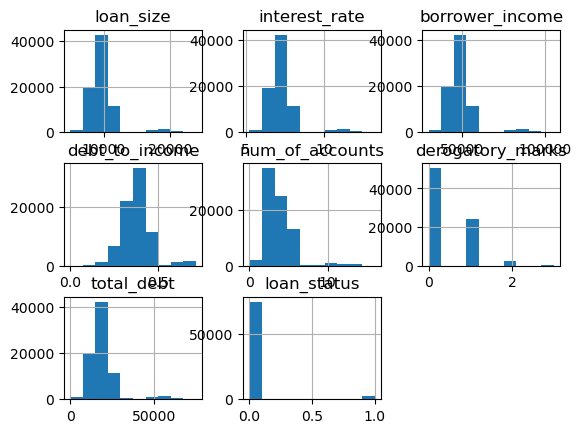

In [28]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("./Resources/lending_data.csv")
df_lending_data = pd.read_csv(file_path)

# Review the DataFrame
print(df_lending_data.head())
print(df_lending_data.tail())
print(df_lending_data.info())
print(df_lending_data.describe())
df_lending_data.hist()


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [29]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_lending_data['loan_status']

# Separate the X variable, the features
X = df_lending_data.drop(columns='loan_status')


In [30]:
# Review the y variable Series
y


0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [31]:
# Review the X variable DataFrame
X


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [32]:
# Check the balance of our target values
labels_balance = y.value_counts()
labels_balance


loan_status
0    75036
1     2500
Name: count, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [34]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(random_state=1)

# Fit the model using training data
classifier.fit(X_train, y_train)


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [35]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).tail(25)  


,Prediction,Actual
38248,0,0
43310,0,0
30006,0,0
47228,0,0
16903,0,0
45194,0,0
58252,0,0
58855,0,0
42641,0,0
64526,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [36]:
# Print the balanced_accuracy score of the model
    ### Splitting into two lines for use as a future personal reference
bal_accuracy_score = balanced_accuracy_score(y_test, predictions)
print(bal_accuracy_score)


0.9442676901753825


In [37]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions)


array([[18679,    80],
       [   67,   558]], dtype=int64)

In [38]:
# Print the classification report for the model
    ### Splitting into two lines for use as a future personal reference
class_report = classification_report(y_test, predictions)
print(class_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.89      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [39]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

# Fit the original training data to the random_oversampler model
# YOUR CODE HERE!

In [40]:
# Count the distinct values of the resampled labels data
# YOUR CODE HERE!

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [41]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

# Fit the model using the resampled training data
# YOUR CODE HERE!

# Make a prediction using the testing data
# YOUR CODE HERE!

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [42]:
# Print the balanced_accuracy score of the model 
# YOUR CODE HERE!

In [43]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!

In [44]:
# Print the classification report for the model
# YOUR CODE HERE!

### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** YOUR ANSWER HERE!